# **Redes Neuronales**

En este cuaderno (Laboratorio 2) vamos a explorar la estructura e implementacion de redes neuronales con una capa oculta, como se ha visto en las lecciones del curso [Deep Learning y Redes Neuronales](https://). Las redes neuronales permiten superar las dificultades que presenta la regresión logistica a la hora de generar fronteras de decisión no lineales, por tanto, las redes neuronales permiten abordar problemas de mayor complejidad.

## **Objetivos**

* Implementar una red neuronal con una capa oculta.
* Graficar la frontera de decisión para visualizar y mejorar la comprensión de como el modelo al tener una capa oculta es capaz de generar fronteras de decisión no lineales.

Para comenzar importaremos algunas liberias utiliza para la implementación. Scikit-Learn o sklearn nos servira para generar nuestros datasets de manera aleatoria y poder experimentar con ellos; matplotlib nos sera util para la visualización de los datos y numpy sera utilizado para el manejo de matrices y vectores.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Una vez cargadas las librerias vamos a crear aleatoriamente un dataset de prueba con 500 elementos, este dataset consiste en 2 clases definidas por 2 valores o caracteristicas.

El tamaño de X es: (500, 2)
El tamaño de Y es: (500,)


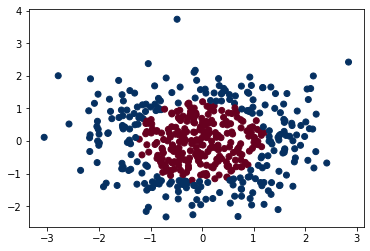

In [ ]:
X, Y = datasets.make_gaussian_quantiles(n_samples=500, n_classes=2) # Crea un dataset de prueba en 2D para clasificacion binaria

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
plt.show()

Una vez cargados los datos, definiremos una funcion para la inicialización aleatoria de los pesos *W* y los bias *b*. Como se vio en las lecciones del curso, la inicialización aleatoria de los pesos *W* ayudara a mejorar el proceso de entrenamiento y garantizara que la capa oculta de la red neuronal no tenga simetría en sus activaciones (mismos valores de salida).

In [ ]:
# Inicializacion de los pesos
def randomInit(n_x, n_h):

  W1 = np.random.randn(n_h, n_x)*0.01
  W2 = np.random.randn(1, n_h)*0.01
  
  b1 = np.zeros((n_h, 1))
  b2 = 0

  return W1, W2, b1, b2

Teniendo nuestra funcion de inicializacion y los datos que vamos a clasificar procedemos a configurar la estructura de la red neuronal y las reglas de aprendizaje del modelo de anera vectorizada, en primer lugar es conveniente definir las dimensiones de nuestras variables.

* X es ($n_x$, m)
* Y es (1, m)
* $W^{[1]}$ es ($n_h$, $n_x$)
* $W^{[2]}$ es (1, $n_h$)
* $b^{[1]}$ es ($n_h$, 1)
* $b^{[2]}$ es un escalar (1, 1)
* $Z^{[1]}$ y $A^{[1]}$ es ($n_h$, m)
* $Z^{[2]}$ y $A^{[2]}$ es (1, m)

Con las dimensiones claras procedemos a definir las operaciones en las capas del modelo.

<center>

**Capa oculta (Capa 1)**

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = tanh(Z^{[1]})$

**Capa de salida (Capa 2)**

$Z^{[2]} = (W^{[2]} A^{[1]}) + b^{[2]}$

$A^{[2]} = \hat{y} = \frac{1}{1 + e^{-Z^{[2]}}}$

</center>

Al igual que en el modelo de regresión logistica, se define una funcion logistica de entropía cruzada debiado a que nos enfrentamos a un problema de clasificación binaria.

<center>

$L(a, y) = -(y\log{(a)} + (1 - y)\log{(1 - a)})$

$J(W, b) = \frac{1}{m} \sum_{i=1}^m L(a^{}, y^{})$

</center>

A partir de esta funcion de costo se pueden definir las reglas de actualización para los pesos $W^{[l]}$ y el bias $b^{[l]}$.

<center>

$W^{[1]} = W^{[1]} - \alpha \frac{\partial J}{\partial W^{[1]}}$

$W^{[2]} = W^{[2]} - \alpha \frac{\partial J}{\partial W^{[2]}}$

$b^{[1]} = b^{[1]} - \alpha \frac{\partial J}{\partial b^{[1]}}$

$b^{[2]} = b^{[2]} - \alpha \frac{\partial J}{\partial b^{[2]}}$

</center>

Para encontrar los gradientes de los pesos $W^{[l]}$ se puede realizar las derivadas parciales correspondientes de la siguiente manera.

<center>

$\frac{\partial J}{\partial W^{[2]}} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial A^{[2]}}*\frac{\partial A^{[2]}}{\partial Z^{[2]}}*\frac{\partial Z^{[2]}}{\partial W^{[2]}}$

$\frac{\partial L}{\partial Z^{[2]}} = dZ^{[2]} = A^{[2]} - Y$

$\frac{\partial J}{\partial W^{[2]}} = \frac{1}{m} dZ^{[2]}A^{[1]T}$

$\frac{\partial J}{\partial W^{[1]}} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial A^{[2]}}*\frac{\partial A^{[2]}}{\partial Z^{[2]}}*\frac{\partial Z^{[2]}}{\partial A^{[1]}}*\frac{\partial A^{[1]}}{\partial Z^{[1]}}*\frac{\partial Z^{[1]}}{\partial W^{[1]}}$

$\frac{\partial L}{\partial Z^{[1]}} = dZ^{[1]} = W^{[2]T}dZ^{[2]}*sec^2(Z^{[1]})$

$\frac{\partial J}{\partial W^{[1]}} = \frac{1}{m} dZ^{[2]}X^T$

</center>

De igual forma para los bias $b^{[l]}$.

<center>

$\frac{\partial J}{\partial b^{[2]}} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial A^{[2]}}*\frac{\partial ^{[2]}}{\partial Z^{[2]}}*\frac{\partial Z^{[2]}}{\partial b^{[2]}}$

$\frac{\partial J}{\partial b^{[2]}} = \frac{1}{m} \sum_{i=1}^m dZ_{ji}^{[2]}$

$\frac{\partial J}{\partial b^{[1]}} = \frac{\partial J}{\partial L}*\frac{\partial L}{\partial A^{[2]}}*\frac{\partial A^{[2]}}{\partial Z^{[2]}}*\frac{\partial Z^{[2]}}{\partial A^{[1]}}*\frac{\partial A^{[1]}}{\partial Z^{[1]}}*\frac{\partial Z^{[1]}}{\partial b^{[1]}}$

$\frac{\partial J}{\partial b^{[1]}} = \frac{1}{m} \sum_{i=1}^m dZ_{ji}^{[1]}$

</center>

In [ ]:
# Funcion de entrenamiento del modelo
def trainNN(X, Y, n_h=2, t=1000, alpha=1):

  # Dimensiones de entrada
  m = X.shape[0]
  n_x = X.shape[1]

  X = X.T
  Y = Y.reshape((1, Y.shape[0]))

  # Inicialización de los pesos
  W1, W2, b1, b2 = randomInit(n_x, n_h)

  # Inicializacion de los gradientes
  dZ1 = np.zeros((n_h, m))
  dZ2 = np.zeros((1, m))
  dW1 = np.zeros((n_h, n_x))
  dW2 = np.zeros((1, n_h))
  db1 = np.zeros((n_h,1))
  db2 = 0

  # Creamos una lista para almacenar los valores del costo
  J = []

  for i in range(t):

    # Realizamos la propagacion hacia adelante (Forward Propagation)

    # Activaciones de la capa oculta (Capa 1)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    # Activaciones de la capa de salida (Capa 2)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1 + np.exp(-Z2))

    # Calculamos los valores del costo en cada iteración
    cost = -(1/m)*(np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))) 
    J.append(cost)

    # Realizamos la propagacion hacia atras (Backpropagation)

    # Calculamos los gradientes de la capa de salida (Capa 2)
    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2, A1.T))
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    # Calaculamos los gradientes de la capa oculta (Capa 1)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1,2)) # sec(x)^2 = 1 - tanh(x)^2
    dW1 = (1/m)*(np.dot(dZ1, X.T))
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    # Actualizamos los pesos realizando un paso de gradiente descendente
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2

  return W1, W2, b1, b2, J

In [ ]:
def predict(x, W1, W2, b1, b2):

  x = x.T

  # Activaciones de la capa oculta (Capa 1)
  Z1 = np.dot(W1, x) + b1
  A1 = np.tanh(Z1)

  # Activaciones de la capa de salida (Capa 2)
  Z2 = np.dot(W2, A1) + b2
  A2 = 1/(1 + np.exp(-Z2))

  y_pred = A2

  return y_pred

In [ ]:
def plotDecisionBoundary(X, W1, W2, b1, b2):

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  grid = np.c_[xx.ravel(), yy.ravel()]
  y_pred = predict(grid, W1, W2, b1, b2).reshape(xx.shape) 
  y_pred = y_pred > 0.5

  plt.contourf(xx, yy, y_pred, cmap="RdBu", alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
  plt.title("Frontera de Decisión")
  plt.show()

Dimensiones W1: (4, 2)
Dimensiones W2: (1, 4)
Dimensiones b1: (4, 1)
Dimensiones b2: (1, 1)
Exactitud del modelo: 93.32 %


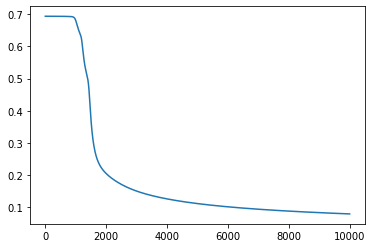

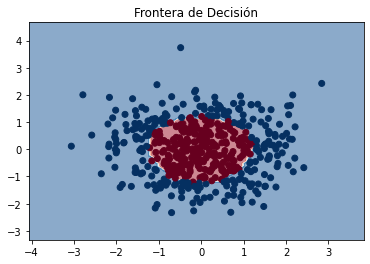

In [ ]:
W1, W2, b1, b2, J = trainNN(X, Y, n_h=4, t=10000, alpha=0.3)

print("Dimensiones W1: " + str(W1.shape))
print("Dimensiones W2: " + str(W2.shape))
print("Dimensiones b1: " + str(b1.shape))
print("Dimensiones b2: " + str(b2.shape))
print("Exactitud del modelo: {:.2f} %".format(100 - np.mean(np.abs(predict(X, W1, W2, b1, b2) - Y)) * 100))

plt.figure(1)
plt.plot(J)

plt.figure(2)
plotDecisionBoundary(X, W1, W2, b1, b2)

El tamaño de X es: (100, 2)
El tamaño de Y es: (100,)


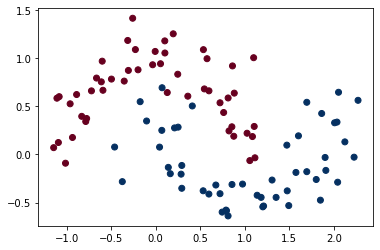

In [ ]:
X, Y = datasets.make_moons(noise=0.2) # Crea un dataset de prueba en 2D para clasificacion binaria

print("El tamaño de X es: " + str(X.shape)) # Tamaño de las variables de entrada
print("El tamaño de Y es: " + str(Y.shape)) # Tamañano de las etiquetas

plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu") # Grafica de los datos
plt.show()

Dimensiones W1: (4, 2)
Dimensiones W2: (1, 4)
Dimensiones b1: (4, 1)
Dimensiones b2: (1, 1)
Exactitud del modelo: 97.50 %


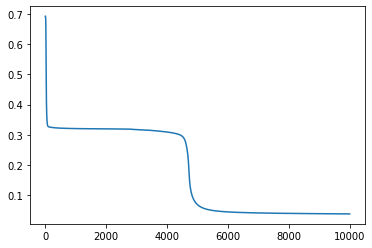

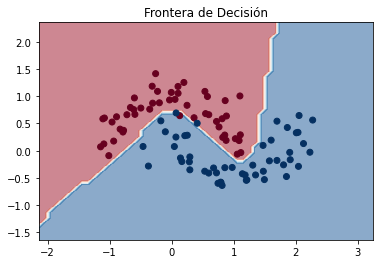

In [ ]:
W1, W2, b1, b2, J = trainNN(X, Y, n_h=4, t=10000, alpha=0.5)

print("Dimensiones W1: " + str(W1.shape))
print("Dimensiones W2: " + str(W2.shape))
print("Dimensiones b1: " + str(b1.shape))
print("Dimensiones b2: " + str(b2.shape))
print("Exactitud del modelo: {:.2f} %".format(100 - np.mean(np.abs(predict(X, W1, W2, b1, b2) - Y)) * 100))

plt.figure(1)
plt.plot(J)

plt.figure(2)
plotDecisionBoundary(X, W1, W2, b1, b2)

# **Retos**

## **Reto 1:** Graficar la frontera de decisión de la red neuronal para diferente numero de unidades ocultas

Escribir un codigo que imprima en pantalla la exactitud y grafique la frontera de decisión para modelos con 2,3, 4, 5, 10 y 20 unidades ocultas. Para los siguientes datos.

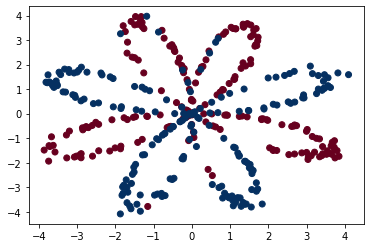

El tamaño de X es: (400, 2)
El tamaño de Y es: (400, 1)


In [ ]:
# Genera un dataset en forma de flor
def flowerDataSet(samples=400):
    N = int(samples/2)
    D = 2
    X = np.zeros((samples,D))
    Y = np.zeros((samples,1), dtype='uint8')
    a = 4

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2
        r = a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

X, Y = flowerDataSet()
plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu")
plt.show()

In [ ]:
n_h = [2, 3, 4, 5, 10] # Dimensiones de la capa oculta

## **Reto 2:** Regresión con red neuronal

Modificar la estructura de la red neuronal para poder realizar regresion sobre los siguientes datos.

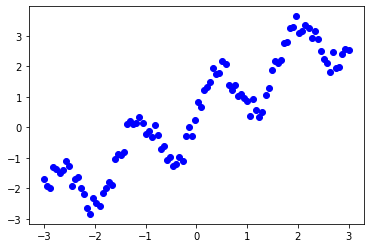

In [ ]:
X = np.linspace(-3, 3, 100)
ruido = np.random.rand(100)*0.8
Y = X + np.sin(4*X) + ruido

plt.scatter(X, Y, c='b') # Grafica de los datos
plt.show()